# Titanic Survival Prediction

# Import Libraries


In [1]:
#Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter


#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning Models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

#Model evaluation
from sklearn.model_selection import cross_val_score

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Remove warnings
import warnings
warnings.filterwarnings("ignore")




# Import and read data

In [2]:
train=pd.read_csv("C:/Users/Chinmai/Desktop/titanic/train.csv")
test=pd.read_csv("C:/Users/Chinmai/Desktop/titanic/test.csv")
ss=pd.read_csv("C:/Users/Chinmai/Desktop/titanic/gender_submission.csv")


#have a look at dataset


'''
Survival: 0 = Did not survive, 1 = Survived
Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.
Sex: Male or female
Age: Age in years, fractional if less than 1
SibSp: Number of siblings or spouses aboard the titanic
Parch: Number of parents or children aboard the titanic
Ticket: Passenger ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: Point of embarkation where C = Cherbourg, Q =  Queenstown, S = Southampton
'''

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


In [6]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
ss.shape

(418, 2)

## EDA

## 1. To examine datatypes, missing data and summary statistics

In [8]:
#non-null count and data types of training and test set

train.info()
print("_"*4)
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
____
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [9]:
#Missing data in training set

In [10]:
#to calculate numbers of missing values(NaN or null values)
#train.isnull(): This part of the code generates a Boolean DataFrame of the same shape as train where each element is True if the corresponding element in train is null and False otherwise.
#sum(): The sum() function is then applied to the Boolean DataFrame. When used on a Boolean DataFrame, it treats True as 1 and False as 0. Therefore, sum() sums the True values in each column, effectively counting the number of missing values in each column.
#sort_values(ascending=False): This function sorts the resulting sum values in descending order. By setting ascending=False, the largest sum (representing the columns with the most missing values) will appear at the top of the sorted series.


train.isnull().sum().sort_values(ascending= False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
#finding missing in test set
test.isnull().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

## Using Missingno to find the missing values
(another way)

<AxesSubplot:>

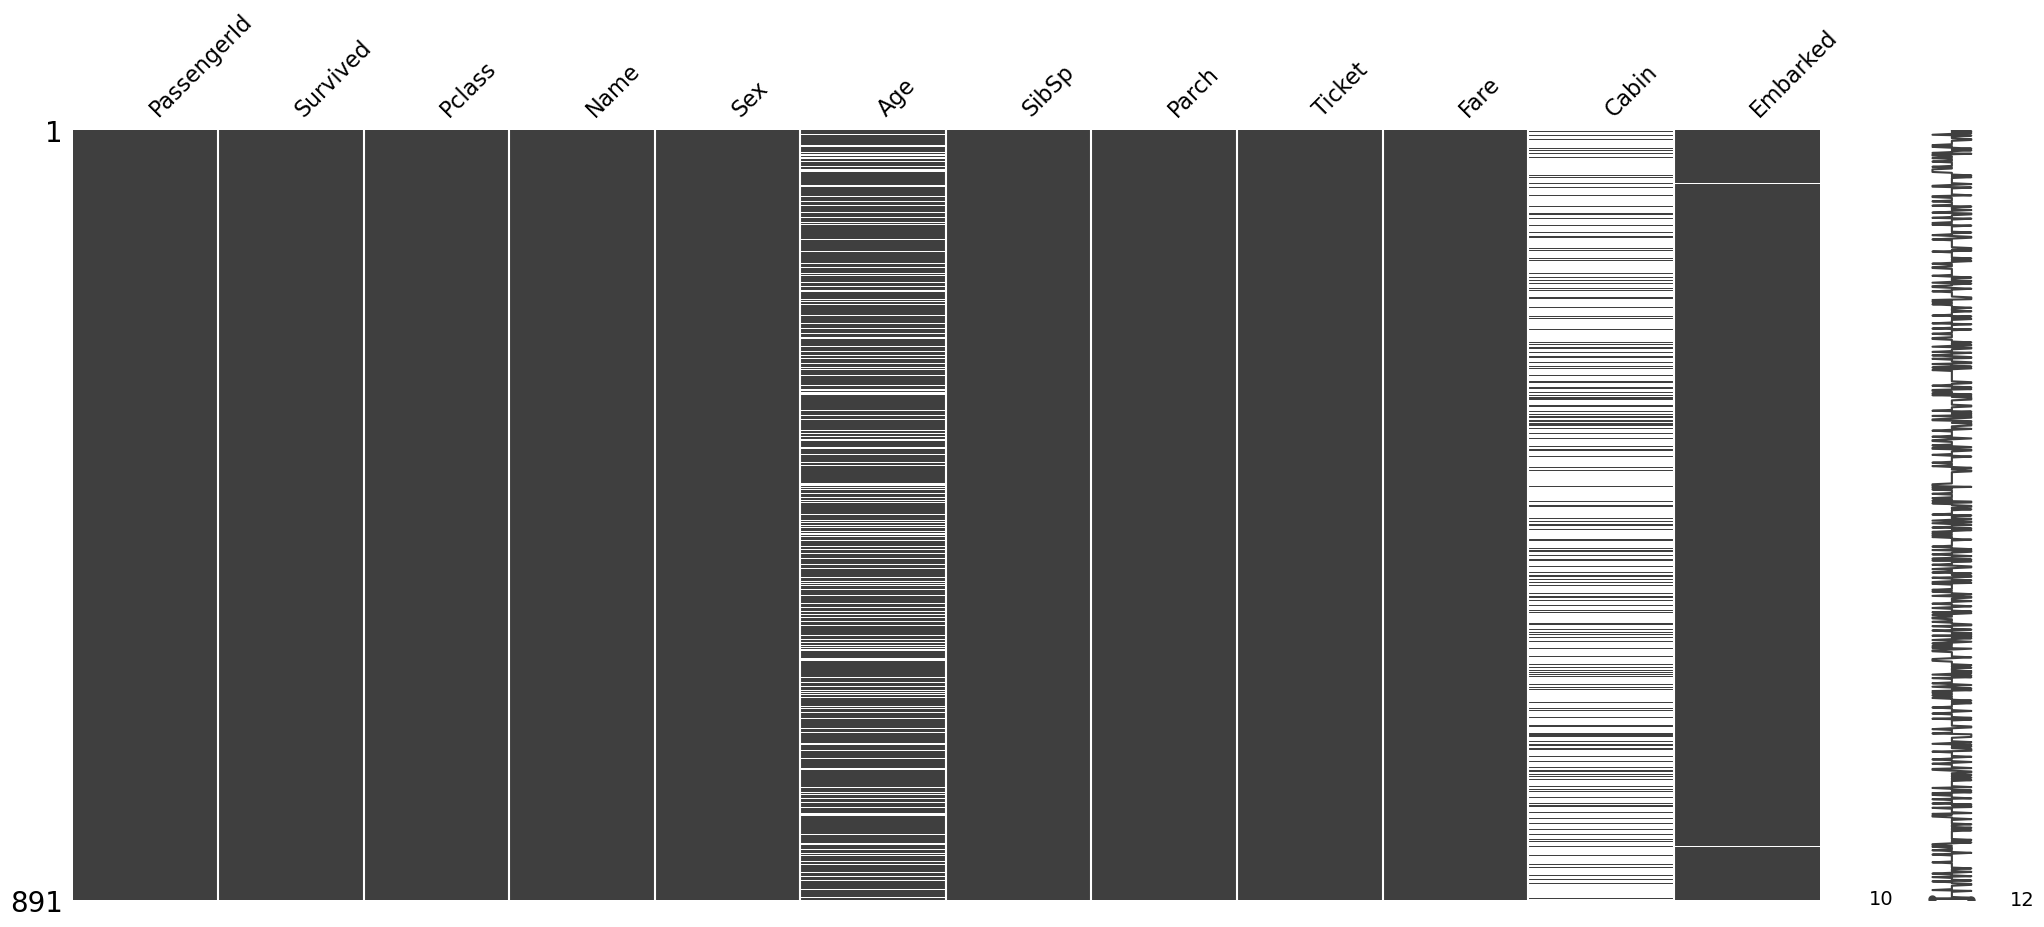

In [12]:
missingno.matrix(train)
#missing value is denoted by white line.

<AxesSubplot:>

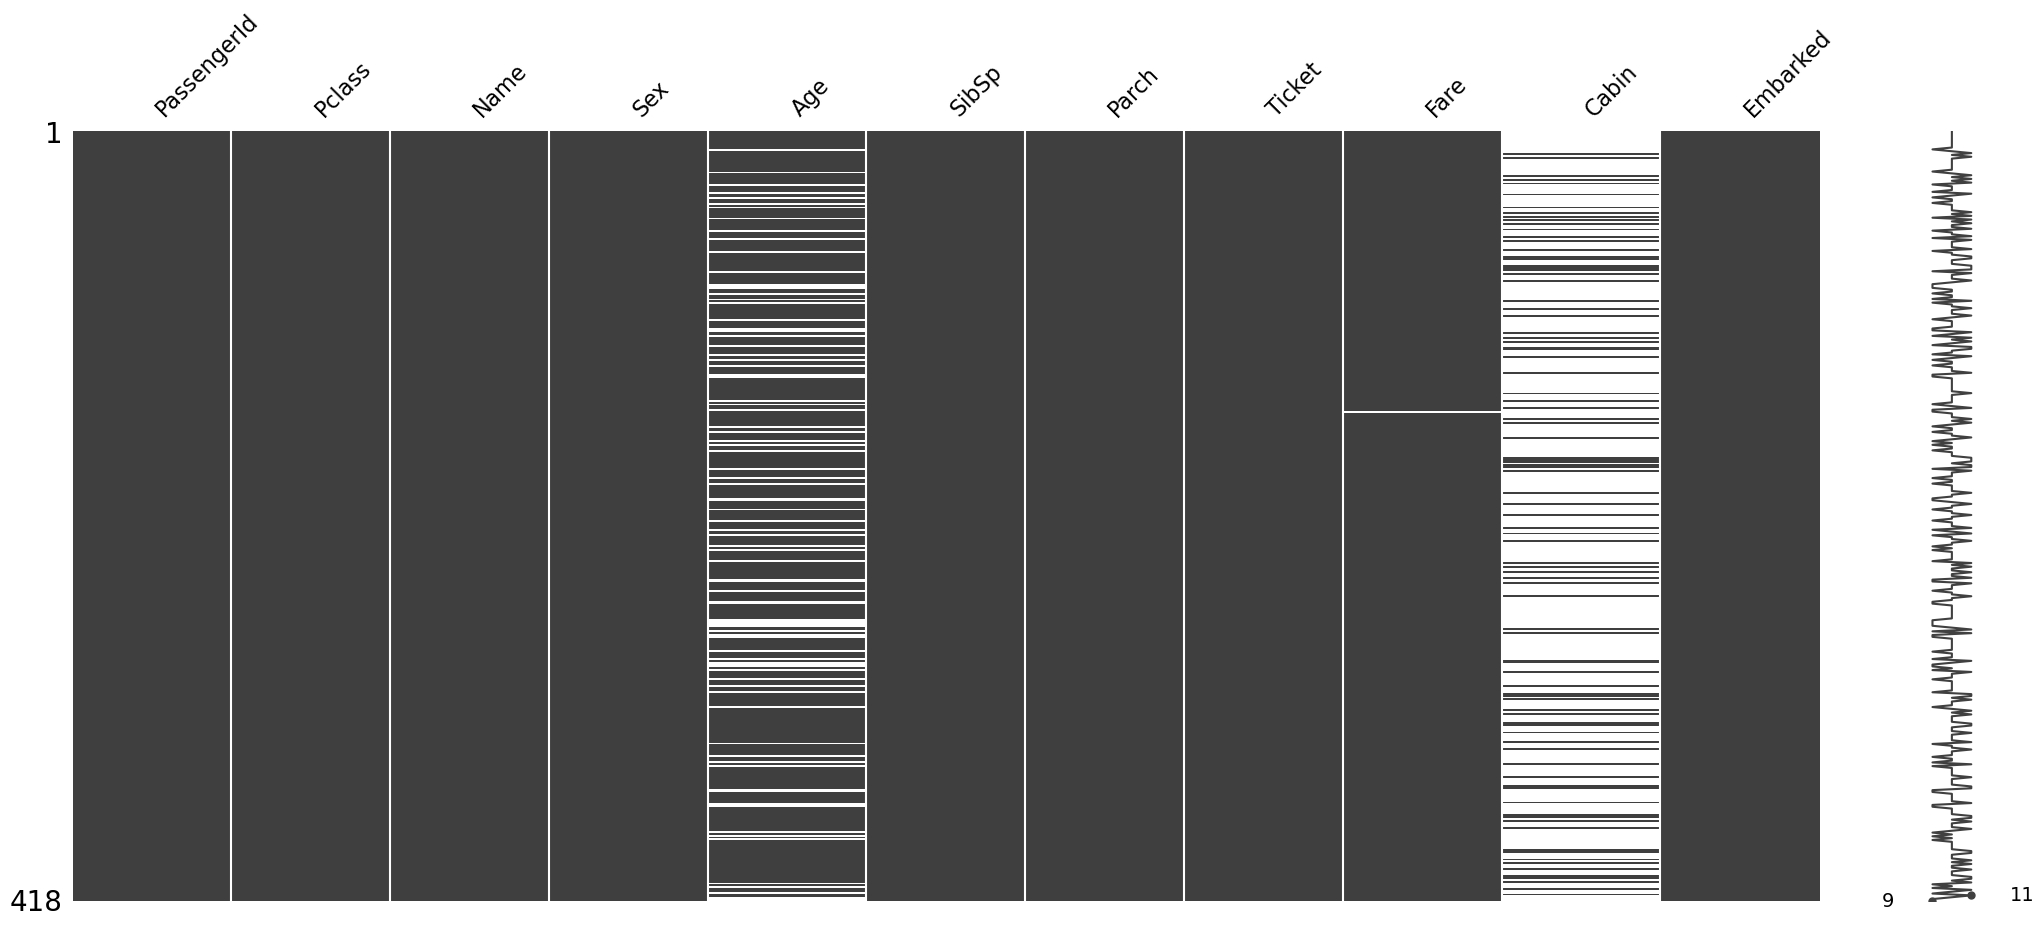

In [13]:
missingno.matrix(test)

# Summary statistics

In [14]:
#for train set
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Feature Analysis-
Variables:
* categorical variable
* numerical variable

Steps for feature analysis of categorical variables:
1. count values
2. find mean wrt target variable (Descriptive Statistics)
3. Visualization (using seaborn and matplotlib)


# CATEGORICAL VARIABLE

In [15]:
# categorical variable= SEX

In [16]:
#Value counts of the sex column

train['Sex'].value_counts(dropna= False)


#Colclusion= There are more male passengers than females.

male      577
female    314
Name: Sex, dtype: int64

In [17]:
#Mean Of Survival By Sex
train[['Sex', 'Survived']].groupby('Sex', as_index= False).mean().sort_values(by= 'Survived', ascending= False)

#Conclusion= Female survival rate is 74% and male's is 18%

,Sex,Survived
0,female,0.742038
1,male,0.188908


# Using seaborn('sns') library nad Matplotlib ('plt')

Text(0.5, 1.0, 'Survival Probability of Gender')

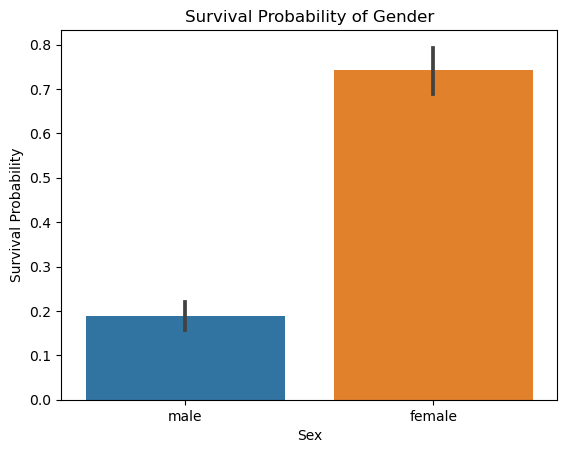

In [18]:
sns.barplot(x= 'Sex', y= 'Survived', data= train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability of Gender')

#Conclusion= Females are more likely to survive

In [19]:
# categorical variable= Pclass

In [20]:
#Value Count of Pclass
train['Pclass'].value_counts(dropna= 'False')

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
#mean of surival by passenger class
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)



,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

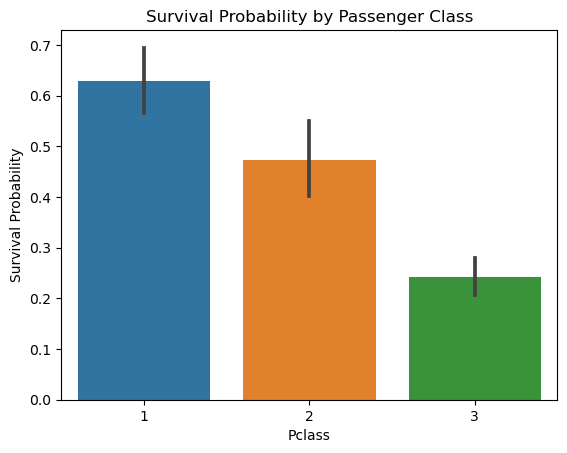

In [22]:
sns.barplot(x= 'Pclass', y= 'Survived', data= train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')



#Conclusion= First class passenger survived the most and 3rt class, the least.

Text(0.5, 1.0, 'Survival Probability of Gender and Passenger Class')

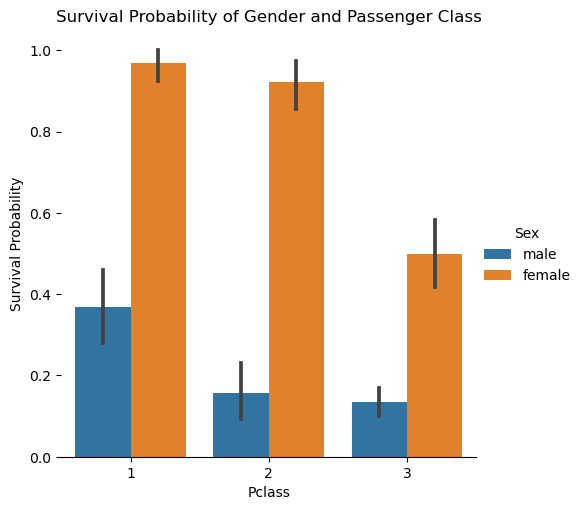

In [23]:
# Survival by both- Sex and Passenger Class
g= sns.factorplot(x= 'Pclass', y= 'Survived', hue= 'Sex', data= train, kind= 'bar')
g.despine(left= 'True')
plt.ylabel('Survival Probability')
plt.title('Survival Probability of Gender and Passenger Class')


#Conclusion= Female survival in all the classes > Male survival in all the classes
#            female/male survivals in 1st class> female/male survivals in 2nd class> female/male survivals in 3rd class

In [24]:
# categorical variable= Embarked
#Embarked: Point of embarkation where C = Cherbourg, Q =  Queenstown, S = Southampton

In [25]:
#Value Count of the Embarked Column

train['Embarked'].value_counts(dropna= False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [26]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)



,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

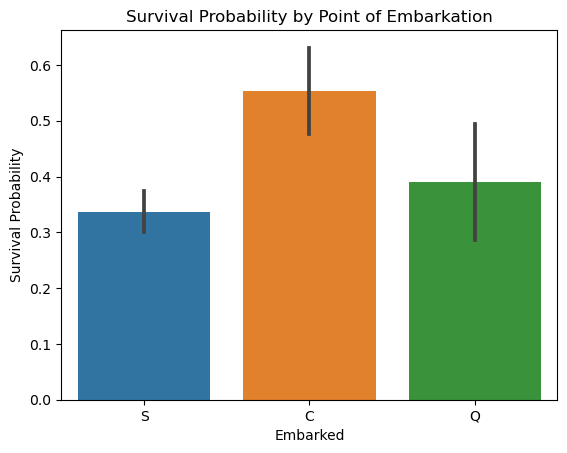

In [27]:
#Visualisation
sns.barplot(x= 'Embarked', y= 'Survived', data= train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')



#Conclusion= Survival Probabilty of C> Q > S

## Hypothesis by the above analyzation
1. Majority of passenger embarked from C belongs to 1st class and majority of passenger embarked from S belong to 3rd class.

2. Majority of passenger embarked from C may be females.

Let us check it:

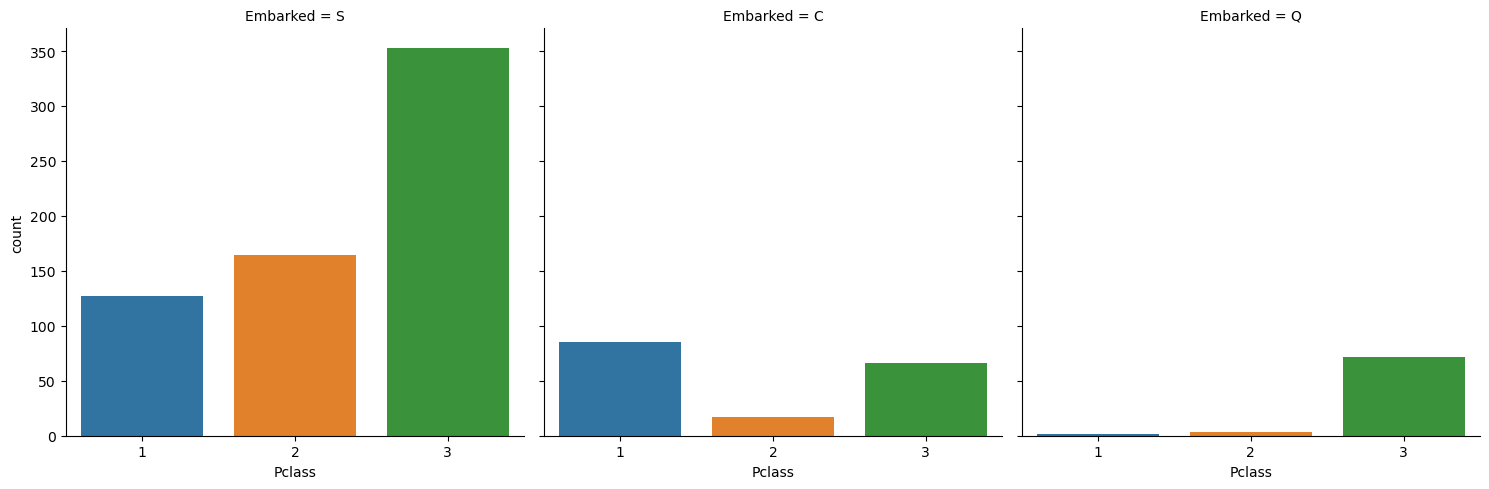

In [28]:
sns.factorplot('Pclass', col= 'Embarked', data= train, kind= 'count')

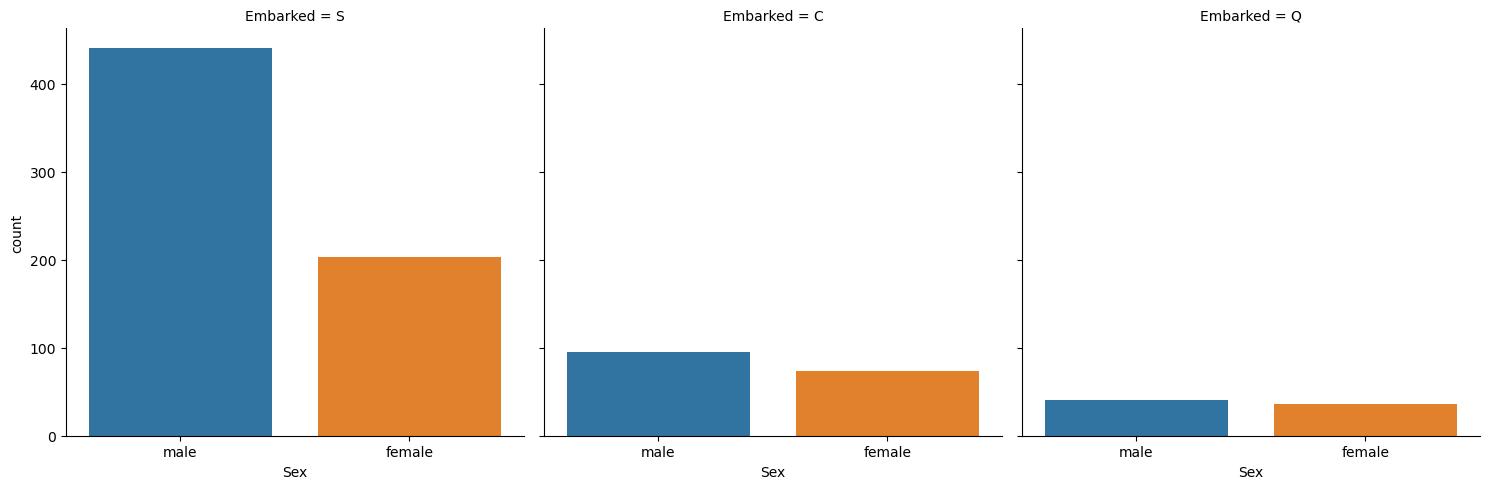

In [29]:
sns.factorplot('Sex', col= 'Embarked', data= train, kind= 'count')

In [30]:
#conclusion= our 1st hypothesis is mostly true and 2nd is somewhat true

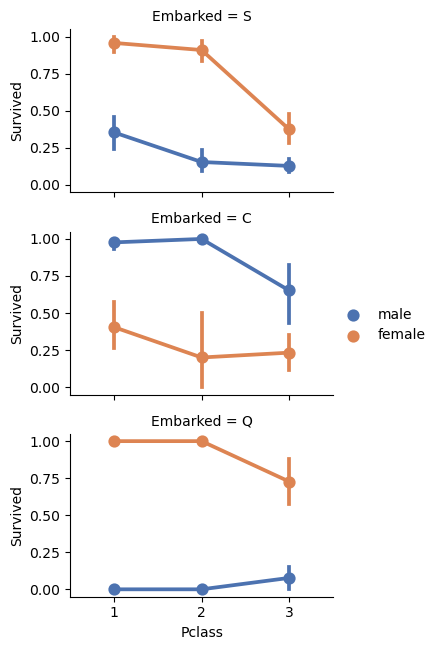

In [31]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(train, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

# NUMERICAL VARIABLES
* Age: Age in years, fractional if less than 1
* SibSp: Number of siblings or spouses aboard the titanic
* Parch: Number of parents or children aboard the titanic
* Fare: Passenger fare

In [32]:
#Detect and remove outliers in numerical variables

# Outliers in numerical variables refer to observations or data points that deviate significantly from the majority of the data points in terms of their values. 
# Outliers can be unusually high or low values that are distant from the central tendency of the data.

In [33]:
def detect_outliers(df, n, features):
    #df= dataframe, 
    #n= the threshold value to consider datapoint as an outlier
    #features= A list of column names (features) from the DataFrame df to be considered for outlier detection.
    
    outlier_indices = [] 
    for col in features: 
        
        #Quartiles are statistical measures that divide a dataset into four equal parts, 
        #each containing 25% of the data.
        
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [34]:
#outliers in numerical variables
train.loc[outliers_to_drop, : ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [35]:
#drop outliers and reset index

print(f"Before: {len(train)} rows")
train= train.drop(outliers_to_drop, axis=0).reset_index(drop= True)
print(f"After: {len(train)} rows")

Before: 891 rows
After: 881 rows


## Numerical  Variables correlation with target variable (survival)

<AxesSubplot:>

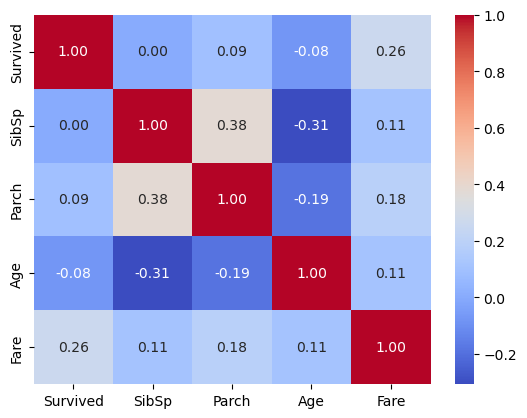

In [36]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

In [37]:
# Numerical variable- SibSp

In [38]:
#value count of Sibsp

train['SibSp'].value_counts(dropna= False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [39]:
#mean survival of SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index= False).mean().sort_values(by = 'Survived', ascending= False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SipSp')

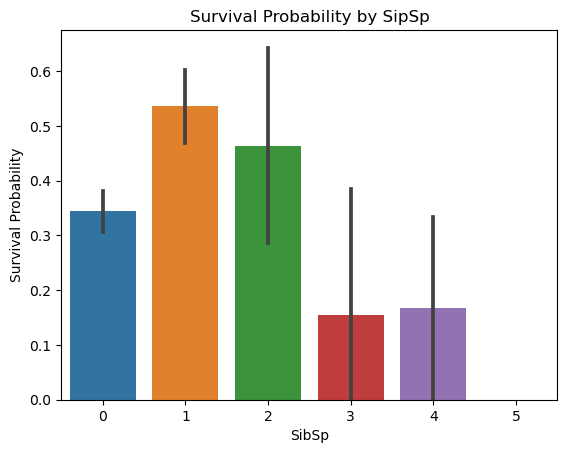

In [40]:
#Visualization
sns.barplot(x= 'SibSp', y='Survived', data= train)
plt.ylabel('Survival Probability')
plt.title("Survival Probability by SipSp")

In [41]:
# Numerical Variable : Parch

In [42]:
#count
train['Parch'].value_counts(dropna= False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [43]:
#mean
#mean survival of Parch

train[['Parch', 'Survived']].groupby('Parch', as_index= False).mean().sort_values(by = 'Survived', ascending= False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

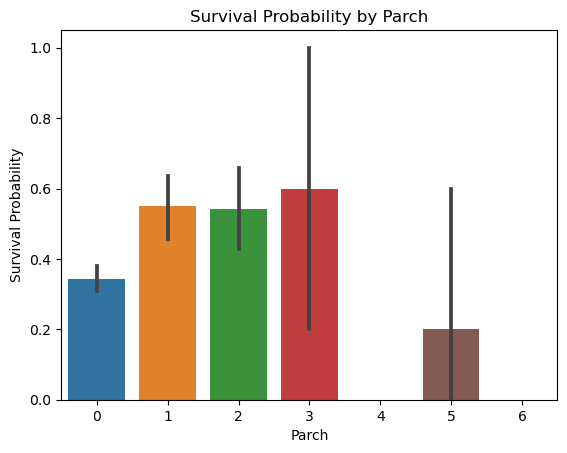

In [44]:
#visual
#Visualization
sns.barplot(x= 'Parch', y='Survived', data= train)
plt.ylabel('Survival Probability')
plt.title("Survival Probability by Parch")

In [45]:
# Numerical Variable : Age

In [46]:
#Nullvalues in age
train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger age distribution')

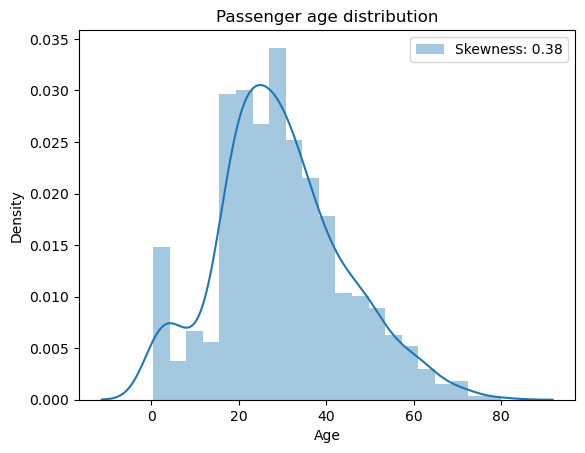

In [47]:
#visual
#Visualization
sns.distplot(train['Age'], label= 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc= 'best')
plt.title("Passenger age distribution")

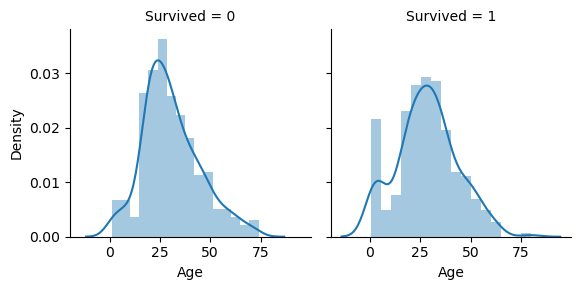

In [48]:
#age distribution by survival

g= sns.FacetGrid(train, col= 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

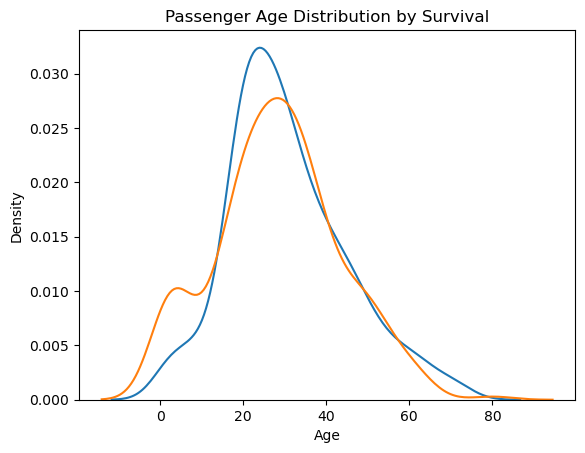

In [49]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

In [50]:
#numerical variable= Fare

Text(0.5, 1.0, 'Passenger Fare distribution')

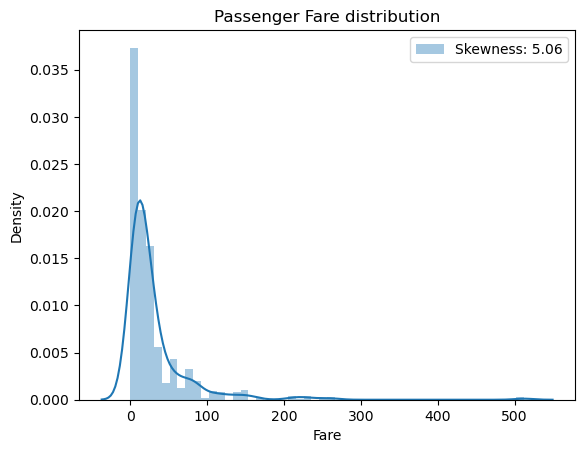

In [51]:
#passenger fare distribution

sns.distplot(train['Fare'], label= 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc= 'best')
plt.title("Passenger Fare distribution")

 Fare seems to have higher skewdness

## Data Preprocessing

"transforming raw data into a clean, consistent, and structured format that can be easily understood and analyzed by machine learning models"

* Drop and fill missing values
* Data transformation
* Feature engineering
* Feature encoding

# drop and fill missing values

In [52]:
#drop ticket and cabin features from training and test set

train= train.drop(['Ticket', 'Cabin'], axis= 1)
test= test.drop(['Ticket', 'Cabin'], axis= 1)

In [53]:
#missing values in training set

train.isnull().sum().sort_values(ascending= False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [54]:
#for embarked column, find MOST FREQUENT VALUE.
#MOST FREQUENT VALUE is compute using the sattistical concept= MODE.

mode= train['Embarked'].dropna().mode()[0]
mode

'S'

In [55]:
#Fill missing values in Embarked with mode

train['Embarked'].fillna(mode, inplace= True)

#any missing values in the 'Embarked' column of the 'train' DataFrame will be replaced with the mode value. 
#This ensures that there are no missing values in the 'Embarked' column, allowing for a complete dataset for further analysis or modeling.

In [56]:
# Missing values in test set

test.isnull().sum().sort_values(ascending= False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [57]:
#Computing median of Fare in test set
# Median= central value

median= test['Fare'].dropna().median()
median

14.4542

In [58]:
# fill missing values using median

test['Fare'].fillna(median, inplace= True)

#Filling missing values with the median is a common approach when dealing with numerical variables. 
#The median represents the central value of the data and is less sensitive to outliers compared to the mean. 
#This makes it a robust choice for handling missing values, especially when the data distribution is skewed or contains extreme values.

In [59]:
#combine test and training sets

combine= pd.concat([train, test], axis=0).reset_index(drop= True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [60]:
#missin value in combined dataframe

combine.isnull().sum().sort_values(ascending= False)

Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [61]:
#convert Sex in Numerical values
# * male= 0
# * female= 1

combine['Sex']= combine['Sex'].map({'male': 0, 'female': 1})

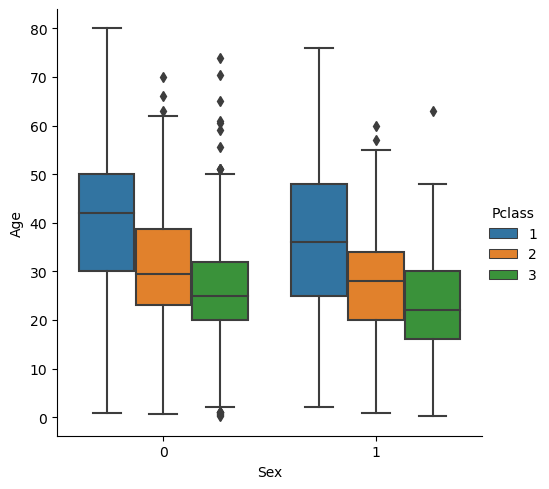

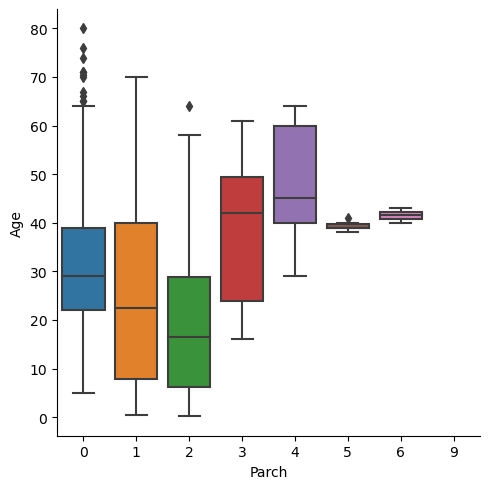

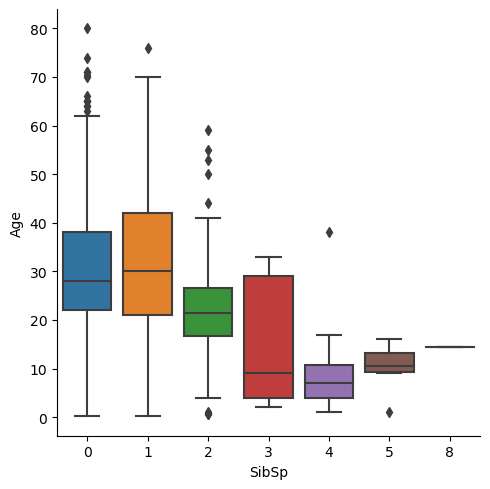

In [62]:
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine)

Hypothesis
* females are slightly younger than male
* older people are in 1st class and younger are in 3rd
* 20 y/o to 40 y/o only have no parent and childen
* 25-65 y/o only have more than 5 children
* 25- 35 y/o only have no siblings

<AxesSubplot:>

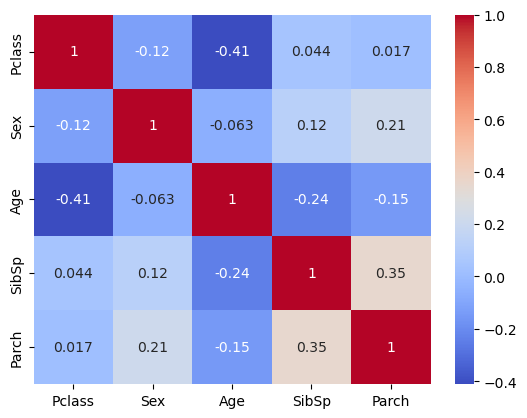

In [63]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')


* Age is least correlated with Sex
* Age is negatively correlated with SibSp, Parch and Pclass


In [64]:
# Check number of missing ages

age_nan_indices= list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

Loop through each missin age in the list to locate the rows that have the same SibSp, Parch and Pclass values 

and fill the missing age with the median of those rows. 

If the rows are not found, simply fill the missing age with the median of the entire age column. 

In [65]:
for index in age_nan_indices:
    median_age= combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index]= median_age
    else:
        combine['Age'].iloc[index]= predict_age
        

In [66]:
combine['Age'].isnull().sum()

0

# Data Transformation

We will apply log transformation to fare column to address high positive skwedness

Text(0.5, 1.0, 'Passenger Fare distribution')

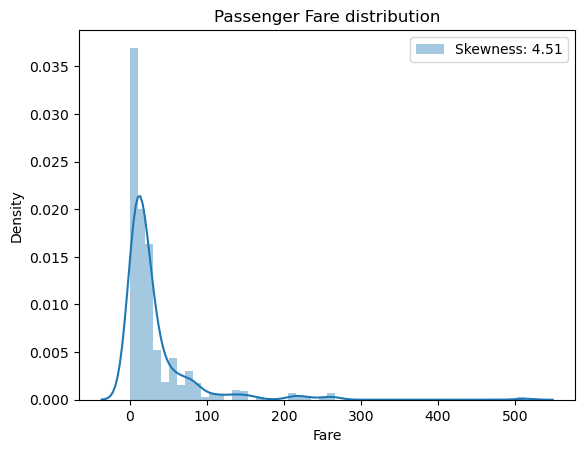

In [67]:
#passenger fare distribution

sns.distplot(combine['Fare'], label= 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc= 'best')
plt.title("Passenger Fare distribution")

In [68]:
combine['Fare']= combine['Fare'].map(lambda x: np.log(x) if x>0 else 0)

Text(0.5, 1.0, 'Passenger Fare distribution after log transformation')

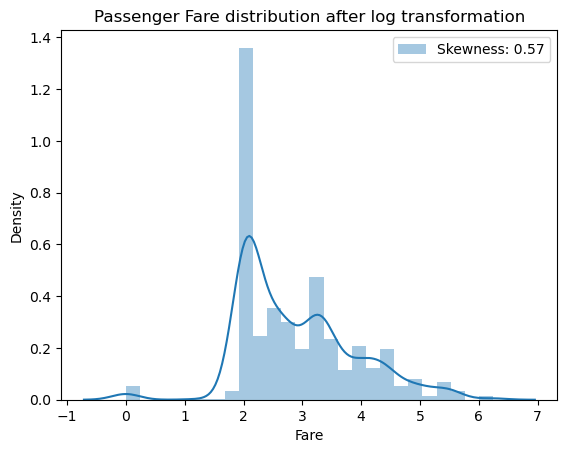

In [69]:
#passenger fare distribution

sns.distplot(combine['Fare'], label= 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc= 'best')
plt.title("Passenger Fare distribution after log transformation")

## Feature engineering

Feature engineering refers to the process of creating new features or transforming existing features from raw data to improve the performance and effectiveness of machine learning models. 

Constructing three new Features
* Title
* isAlone
* Age*Class

# Title

In [70]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [71]:
#title from name: Mrs, Miss, Mr

combine['Title']= [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [72]:
# Value count of Title

combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [73]:
#Number of unique title

combine['Title'].nunique()

18

In [74]:
# Simplifying the titles
combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')



<AxesSubplot:xlabel='Title', ylabel='count'>

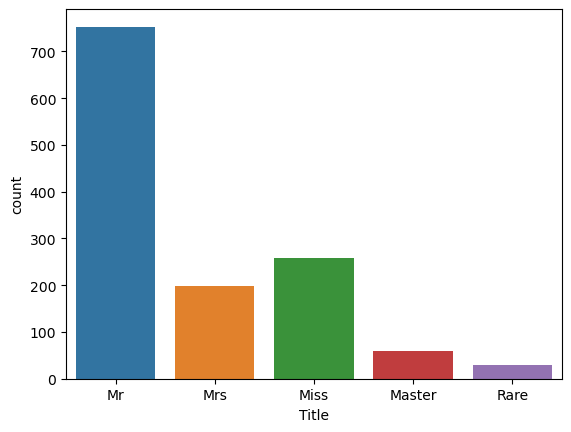

In [75]:
#visualising

sns.countplot(combine['Title'])

In [76]:
#Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index= False).mean().sort_values(by= 'Survived', ascending= False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean survival by title')

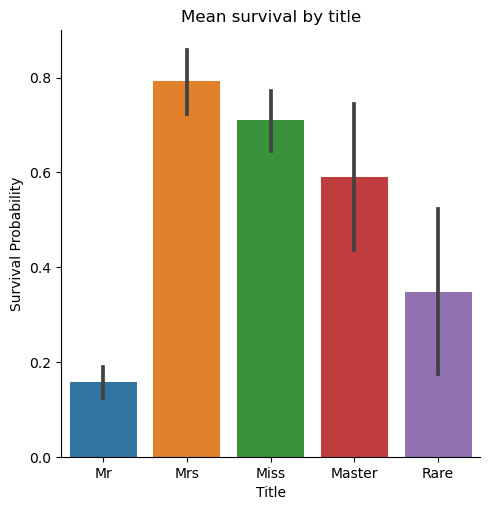

In [77]:
sns.factorplot(x= "Title", y="Survived", data= combine, kind= 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean survival by title')

In [78]:
combine= combine.drop('Name', axis=1) 
#drop the name column
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


# IsAlone

In [79]:
#we are gonna make a family size column by adding no. of parents and children(Parch)
#, no. of siblings(SibSp) and the person

combine['FamilySize']= combine['SibSp']+ combine['Parch']+1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [80]:
#mean survival by family size


combine[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index= False).mean().sort_values(by= 'Survived', ascending= False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [81]:
#creating IsAlone Feature

combine['IsAlone']=0
combine.loc[combine['FamilySize']== 1, 'IsAlone']= 1

In [82]:
#Mean of survival by name IsAlone


combine[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index= False).mean().sort_values(by= 'Survived', ascending= False)


#conclusion= passengers who were not alone are more likely to survive

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [83]:
# drop SibSp, Parch, FamilySize from combine

combine= combine.drop(['SibSp', 'Parch', 'FamilySize'], axis= 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


# Age*Class

First= Transform Age into an "ORDINAL Variable"

We will group into 5 seprate age bands,
Then assign a number to these age bands.

In [84]:
#Create age bands

combine['AgeBand']= pd.cut(combine['Age'], 5)

#Compute mean survival of age bands

combine[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index= False).mean().sort_values(by= 'Survived', ascending= False)


,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
3,"(48.068, 64.034]",0.434783
2,"(32.102, 48.068]",0.412844
1,"(16.136, 32.102]",0.339662
4,"(64.034, 80.0]",0.090909


In [85]:
#Assign ordinals to each band


combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4


In [86]:
#drop age band feature
combine= combine.drop('AgeBand', axis=1)

In [87]:
combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [88]:
#Convert ordinal age to integer

combine['Age']= combine['Age'].astype('int')
combine['Age'].dtype

dtype('int32')

In [89]:
#Creating Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


# Feature encoding

Feature encoding, also known as variable encoding or categorical encoding, is the process of converting categorical variables into a numerical representation that can be used as input for machine learning models.

* We have already encoded sex column, 0= male, 1= female
  * Now, Title and Embarked are left
  
* We have encoded age by converting it to ordinal variable.
    * Doing same for Fare column.

In [90]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [91]:
#encoding Title and Embarked

combine= pd.get_dummies(combine, columns= ['Title'])
combine= pd.get_dummies(combine, columns= ['Embarked'], prefix= 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [92]:
#Divide Fare into four bands
combine['FareBand']= pd.cut(combine['Fare'], 4)

#Compute mean survival of Fare bands
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index= False).mean().sort_values(by= 'FareBand')


,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [93]:
#assigning ordinals

combine.loc[combine['Fare']<=1.56, 'Fare']= 0
combine.loc[(combine['Fare']>1.56) & (combine['Fare']<= 3.119) , 'Fare']= 1
combine.loc[(combine['Fare']>3.119) & (combine['Fare']<= 4.679) , 'Fare']= 2
combine.loc[combine['Fare']> 4.679 , 'Fare']= 3

In [94]:
# convert fare into integer

combine['Fare']= combine['Fare'].astype('int')

In [95]:
#Drop fareband
combine= combine.drop('FareBand', axis= 1)

In [96]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


# Separate tarining and test dataset from combine dataframe

In [97]:
train= combine[:len(train)]
test= combine[len(train):]

In [98]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [99]:
# Drop passengerId from training set
train= train.drop('PassengerId', axis= 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [100]:
# converting survived to int

train['Survived']= train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [101]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [102]:
test= test.drop('Survived', axis= 1)
test.head()

# Obviously, cause it's our target variable

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


Data frames are ready for modelling.

## Modelling

Modeling refers to the process of creating a mathematical or statistical representation of a real-world problem or system. 

It involves developing a predictive model that can learn patterns and relationships from the available data and make predictions or decisions on new, unseen data.

* LIBRARY USED: Sckit-learn

Titanic is a classification problem, we will use classification models, known as classifiers.

# Split training data

We need to first split our training data into independent variables or predictor variables, represented by X as well as dependent variable or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [103]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


# Fit model to data and make predictions
This requires 3 simple steps: instantiate the model, fit the model to the training set and predict the data in test set.

# Instantiate the model: 
you create an instance of the model you want to use. The specific model depends on the problem you're trying to solve.

# Logistic regression
on a classification problem, we instantiate a logistic regression model.

In [104]:
# initializing the logistic regression model with default settings.
logreg = LogisticRegression()

# FIT THE MODEL INTO TRAINING SET
logreg.fit(X_train, Y_train)

# MAKE PREDICTION ON TEST SET
Y_pred = logreg.predict(X_test)

# Calculate training accuracy
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.93

# Support vector machine

In [105]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

# K-nearest neighbours (KNN)

In [106]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.34

 # Gaussian naive bayes

In [107]:
gaussian= GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred= gaussian.predict(X_test)

acc_gaussian= round(gaussian.score(X_train, Y_train)* 100, 2)
acc_gaussian

79.11

 # Perceptron

In [108]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.57

# Linear SVC

In [109]:
linear_svc = LinearSVC()

linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

# Stochastic gradient descent

In [110]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.46

# Decision tree

In [111]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

# Random forest

In [112]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

# CatBoost

In [113]:
catboost= CatBoostClassifier()

catboost.fit(X_train, Y_train)

Y_pred= catboost.predict(X_test)

acc_catboost= round(catboost.score(X_train, Y_train)* 100, 2)

acc_catboost

Learning rate set to 0.00976
0:	learn: 0.6868136	total: 156ms	remaining: 2m 36s
1:	learn: 0.6798485	total: 160ms	remaining: 1m 20s
2:	learn: 0.6729520	total: 163ms	remaining: 54.1s
3:	learn: 0.6669729	total: 165ms	remaining: 41.1s
4:	learn: 0.6607853	total: 167ms	remaining: 33.2s
5:	learn: 0.6554568	total: 169ms	remaining: 28.1s
6:	learn: 0.6500727	total: 171ms	remaining: 24.2s
7:	learn: 0.6437982	total: 173ms	remaining: 21.4s
8:	learn: 0.6398272	total: 174ms	remaining: 19.2s
9:	learn: 0.6351628	total: 176ms	remaining: 17.4s
10:	learn: 0.6305969	total: 178ms	remaining: 16s
11:	learn: 0.6252274	total: 182ms	remaining: 15s
12:	learn: 0.6203165	total: 184ms	remaining: 14s
13:	learn: 0.6163249	total: 186ms	remaining: 13.1s
14:	learn: 0.6126752	total: 187ms	remaining: 12.3s
15:	learn: 0.6078515	total: 189ms	remaining: 11.6s
16:	learn: 0.6033553	total: 191ms	remaining: 11s
17:	learn: 0.5984437	total: 193ms	remaining: 10.5s
18:	learn: 0.5935188	total: 194ms	remaining: 10s
19:	learn: 0.5898024

85.7

# Model Evaluation and Hyperparameter Tuning

to assess the performance of a model and optimize its parameters for better results. 

# Training accuracy
Training accuracy shows how well our model has learned from the training set.

In [114]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False, ignore_index= True)

,Model,Score
0,Random Forest,85.70
1,Decision Tree,85.70
2,CatBoost,85.70
3,KNN,84.34
4,Support Vector Machines,83.09
5,Logistic Regression,80.93
6,Linear SVC,80.25
7,Perceptron,79.57
8,Stochastic Gradient Decent,79.46
9,Naive Bayes,79.11


# K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in.

K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes.

By using K-fold cross-validation, we can obtain a more robust assessment of our model's performance and make more informed decisions during model development and hyperparameter tuning.

In [115]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [116]:
# list that contains cross validation for each classifier

cv_results= []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring= 'accuracy', cv= 10))

Learning rate set to 0.009326
0:	learn: 0.6870154	total: 1.43ms	remaining: 1.43s
1:	learn: 0.6803102	total: 2.7ms	remaining: 1.35s
2:	learn: 0.6743326	total: 3.9ms	remaining: 1.29s
3:	learn: 0.6684760	total: 5.2ms	remaining: 1.29s
4:	learn: 0.6624557	total: 6.4ms	remaining: 1.27s
5:	learn: 0.6573314	total: 7.52ms	remaining: 1.25s
6:	learn: 0.6520748	total: 8.88ms	remaining: 1.26s
7:	learn: 0.6460856	total: 10.1ms	remaining: 1.25s
8:	learn: 0.6422711	total: 11.1ms	remaining: 1.22s
9:	learn: 0.6376840	total: 12.4ms	remaining: 1.23s
10:	learn: 0.6326541	total: 14.1ms	remaining: 1.27s
11:	learn: 0.6272334	total: 15.4ms	remaining: 1.27s
12:	learn: 0.6224744	total: 16.7ms	remaining: 1.26s
13:	learn: 0.6175199	total: 18.6ms	remaining: 1.31s
14:	learn: 0.6124417	total: 20ms	remaining: 1.31s
15:	learn: 0.6097890	total: 20.8ms	remaining: 1.28s
16:	learn: 0.6050558	total: 22.3ms	remaining: 1.29s
17:	learn: 0.6004952	total: 23.6ms	remaining: 1.28s
18:	learn: 0.5958639	total: 24.9ms	remaining: 1.29

In [117]:
# Mean and standard deviation of cross validation results for classifier

cv_mean= []
cv_std= []

for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [118]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.820684,0.038157,KNN
2,0.815028,0.036378,CatBoost
3,0.805950,0.034300,Random Forest
4,0.804801,0.029279,Logistic Regression
5,0.800243,0.033294,Linear SVC
6,0.787768,0.025679,Decision Tree
7,0.783223,0.041915,Gausian Naive Bayes
8,0.758312,0.069678,Stochastic Gradient Descent
9,0.733287,0.043881,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

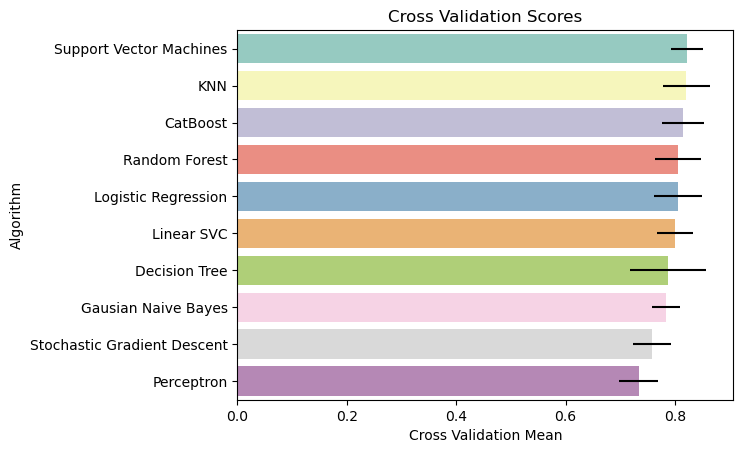

In [119]:
#Visualisation

sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

# Hyperparameter Tuning 
## for SVM

Hyperparameter tuning is the process of selecting the best combination of hyperparameters for a machine learning model to optimize its performance. 

Hyperparameters are parameters that are not learned from the data but are set by the user before training the model. 


In [120]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [121]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [122]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [123]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv= 10).mean() 

0.8297242083758938

our mean cross validation improved slightly

In [124]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [125]:
len(Y_pred)

418

# Preparing Data For Submission

In [126]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [127]:
ss.shape

(418, 2)

So, according to ss dataframe, we will create our data frame with 418 roes and 2 column

In [128]:
# create submission dataframe

submit= pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})

submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [129]:
submit.shape

(418, 2)

In [130]:
#create and save csv file

submit.to_csv("C:/Users/Chinmai/Desktop/titanic/svm_titanic.csv", index= False)